In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carrega a imagem
img = cv2.imread("../Pictures/peppers.jpg")

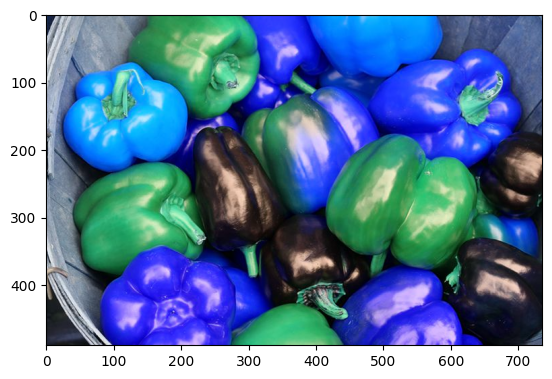

In [2]:
plt.imshow(img)
plt.show()

In [68]:
def count_colors(hsv_img, color, max_area):
    if color == "yellow":
        # Define o intervalo de cor que corresponde à cor amarela
        lower = np.array([20, 100, 100])
        upper = np.array([30, 255, 255])
        
    if color == "green":
        lower = np.array([60, 50, 50])
        upper = np.array([150, 255, 255])
        
    if color == "red":
        lower = np.array([0, 120, 120])
        upper = np.array([10, 255, 255])
        
    if color == "black":
        lower = np.array([0, 0, 0])
        upper = np.array([180, 255, 30])
        
    # Cria uma máscara para filtrar os pixels que correspondem à 
    mask = cv2.inRange(hsv_img, lower, upper) 
    
    # Aplique uma operação morfológica para melhorar a qualidade da máscara
    kernel = np.ones((5, 5), np.uint8)
    morph_img = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    
    # Encontre os contornos dos objetos na imagem
    contours, hierarchy = cv2.findContours(morph_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)   
    
    cnts = 0
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > max_area:  # Verifica se o contorno é grande o suficiente
            (x, y, w, h) = cv2.boundingRect(cnt)
            roi = hsv_img[y:y+h, x:x+w]
            avg_color = np.average(roi, axis=0)
            avg_color = np.average(avg_color, axis=0)
            if avg_color[0] >= lower[0] and avg_color[0] <= upper[0]:
                cnts += 1
                
    return cnts

In [22]:
# Converte a imagem do espaço de cores RGB para o espaço de cores HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [45]:
count_colors(hsv, "yellow", 700)

2

In [60]:
count_colors(hsv, "green", 800)

5

In [67]:
count_colors(hsv, "red", 40)

9

In [70]:
count_colors(hsv, "black", 800)

4